In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
def ResBlock(X_input, in_f, out_f):
    
    # First block
    X = tf.keras.layers.Conv2D(in_f, kernel_size=(1, 1), strides=1, padding='valid', kernel_initializer='glorot_uniform')(X_input)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Second block
    X = tf.keras.layers.Conv2D(in_f, kernel_size=(3, 3), strides=1, padding='same', kernel_initializer='glorot_uniform')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    # Third block
    X = tf.keras.layers.Conv2D(out_f, kernel_size=(1, 1), strides=1, padding='valid', kernel_initializer='glorot_uniform')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    
    # Shortcut path
    X_shortcut = tf.keras.layers.Conv2D(out_f, kernel_size=(1, 1), strides=1, padding='valid', kernel_initializer='glorot_uniform')(X_input)
    X_shortcut = tf.keras.layers.BatchNormalization(axis=3)(X_shortcut)
    
    # Merge input and the new branch
    X = tf.keras.layers.Add()([X_shortcut, X])
    X = tf.keras.layers.Activation('relu')(X)

    return X

In [13]:
def ESResNet(input_shape):
    
    X_input = tf.keras.Input(input_shape)
    
    X = tf.keras.layers.Conv2D(64, kernel_size=(7, 7), strides=2, padding='same', kernel_initializer='glorot_uniform')(X_input)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    
    X = ResBlock(X, 64, 256)
    X = ResBlock(X, 256, 512)
    X = ResBlock(X, 512, 1024)
    X = ResBlock(X, 1024, 2048)

    X = tf.keras.layers.AveragePooling2D(pool_size=2)(X)
    
    X = tf.keras.layers.Flatten()(X)
    
    X = tf.keras.layers.Dense(1024, activation='relu')(X)
    
    out = tf.keras.layers.Dense(50, activation='softmax')(X)
    
    model = tf.keras.Model(inputs=X_input, outputs=out, name='ESResNet')
    
    return model

In [14]:
#test_data = np.random.rand()

ESResNet = ESResNet((60, 41, 2))
ESResNet.summary()

Model: "ESResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 60, 41, 2)]  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 30, 21, 64)   6336        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_51 (BatchNo (None, 30, 21, 64)   256         conv2d_51[0][0]                  
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 30, 21, 64)   0           batch_normalization_51[0][0]     
___________________________________________________________________________________________

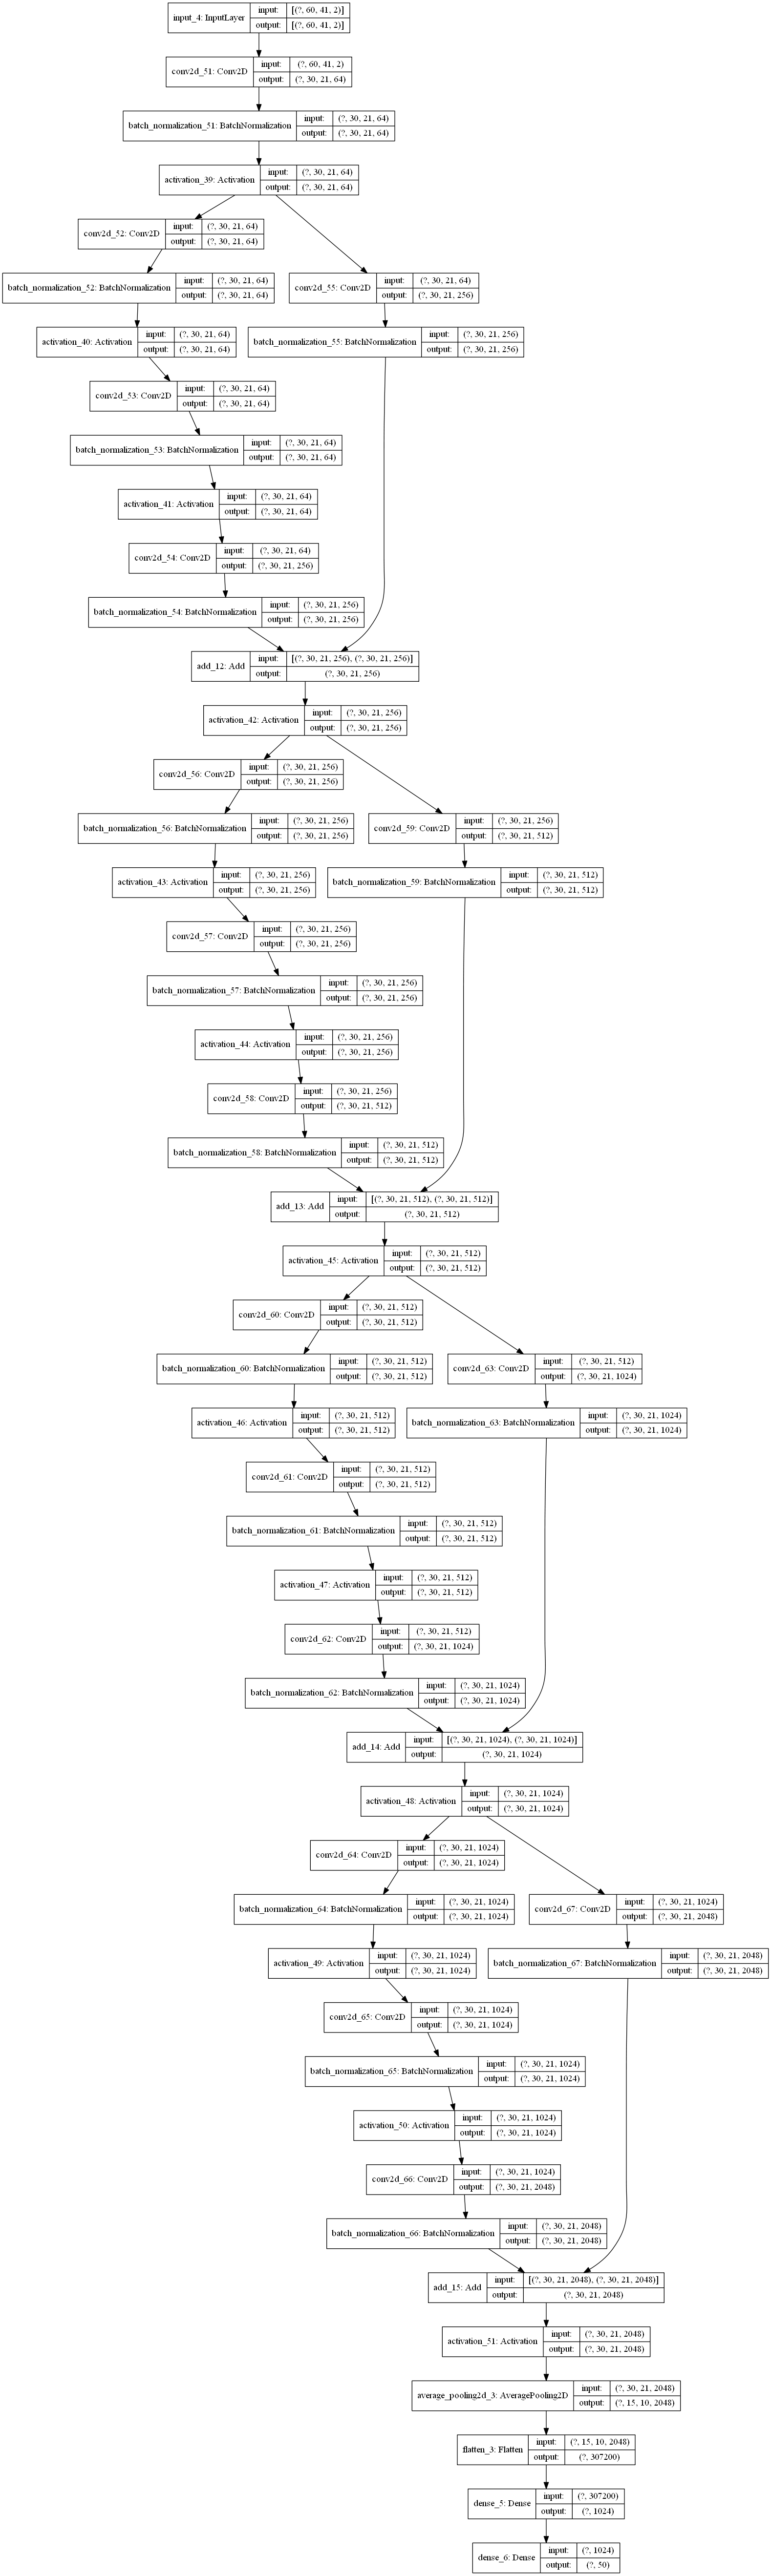

In [15]:
plot_model(ESResNet, show_shapes=True, show_layer_names=True)